# Import library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Data

In [2]:
data  = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')

# Data Analysis

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
data['CRIM'].fillna(data['CRIM'].median(), inplace=True)
data['ZN'].fillna(data['ZN'].median(), inplace=True)
data['INDUS'].fillna(data['INDUS'].median(), inplace=True)
data['CHAS'].fillna(data['CHAS'].median(), inplace=True)
data['AGE'].fillna(data['AGE'].median(), inplace=True)
data['LSTAT'].fillna(data['LSTAT'].median(), inplace=True)

In [7]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


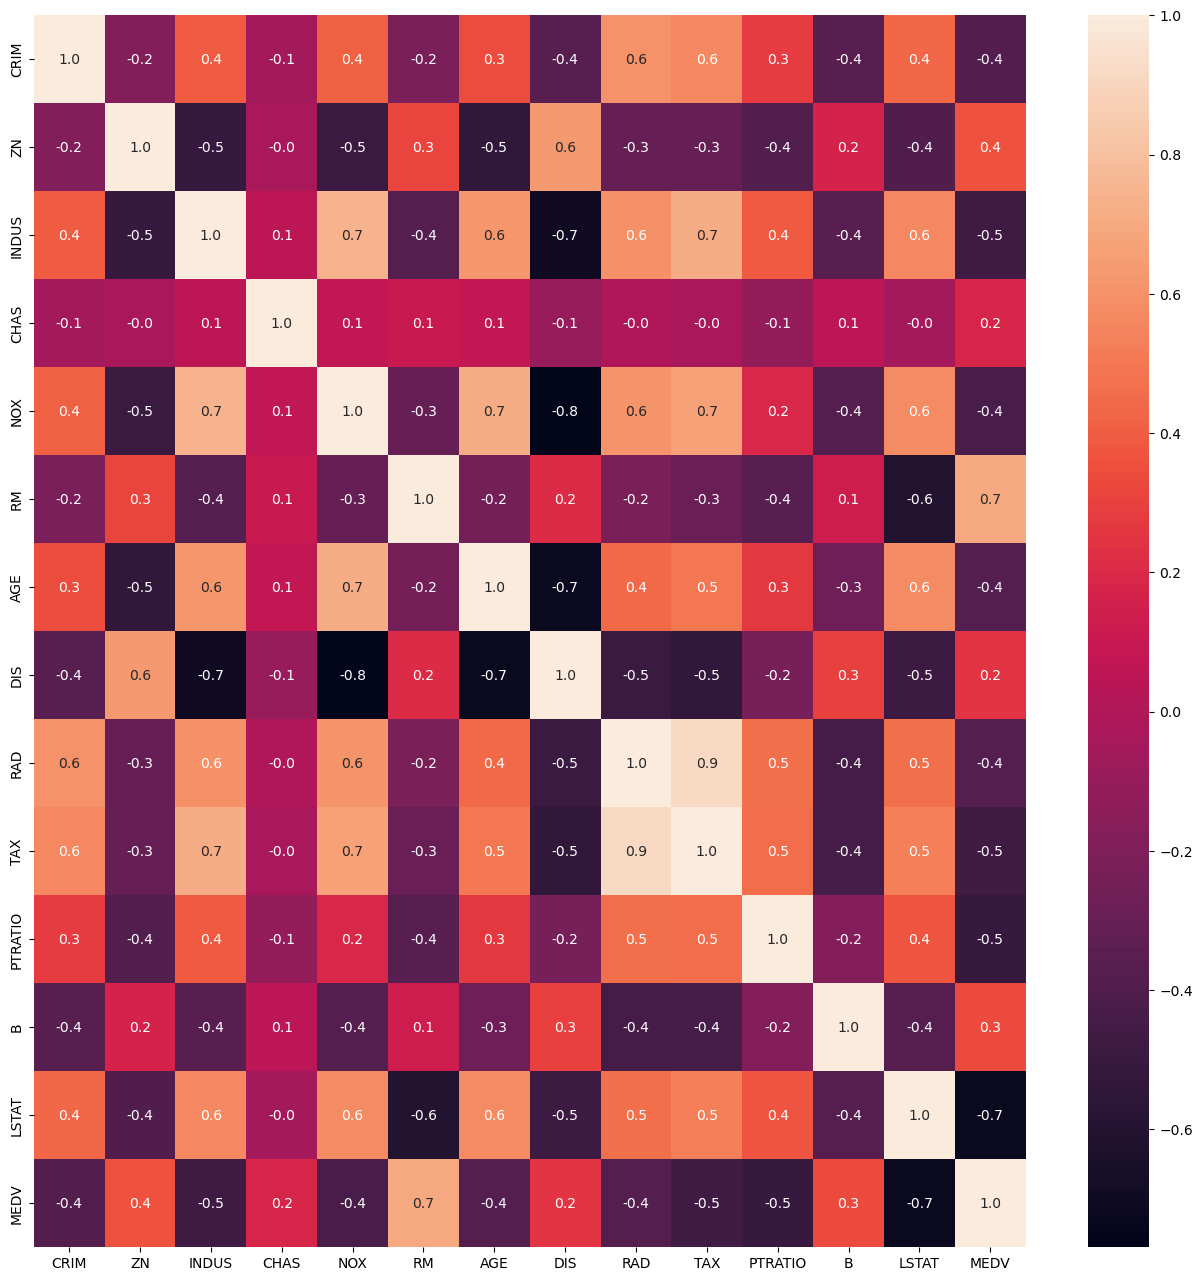

In [9]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True, fmt=".1f");

<Axes: >

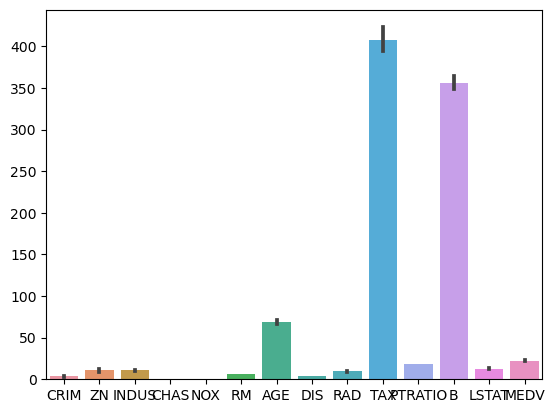

In [10]:
sns.barplot(data)

# Data Preprocessing

In [11]:
X = data.drop('MEDV',axis = 1)
y = data['MEDV']

#### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Model

In [14]:
def model(model, x_train, y_train, x_test, y_test):
    mod = model
    mod_fit = mod.fit(x_train, y_train)
    y_pred = mod_fit.predict(x_test)
    print("accuracy : ")
    print(mod.score(x_train, y_train))
    print('Model results')
    print('MAE:', mean_absolute_error(y_pred, y_test).round(2))
    print('MSE:', mean_squared_error(y_pred, y_test).round(2))
    print('RMSE:', np.sqrt(mean_absolute_error(y_pred, y_test)).round(2))
    print('R2_score:', r2_score(y_pred, y_test).round(2))
    print('-'*20)
    
    df_model = pd.DataFrame({
    'Test': y_test,
    'Predict': y_pred
    })
    print(df_model.head(10))
    
    plt.figure(figsize = (14, 8))
    sns.regplot(x = y_test, y = y_pred)

## Linear Regression

accuracy : 
0.7400495041694352
Model results
MAE: 3.04
MSE: 18.21
RMSE: 1.74
R2_score: 0.63
--------------------
     Test    Predict
251  24.8  24.984525
464  21.4  19.779299
119  19.3  20.850341
336  19.5  20.167527
281  35.4  35.082465
236  25.1  31.335071
6    22.9  23.375938
127  16.2  14.323644
365  27.5  13.567706
266  30.7  31.065033


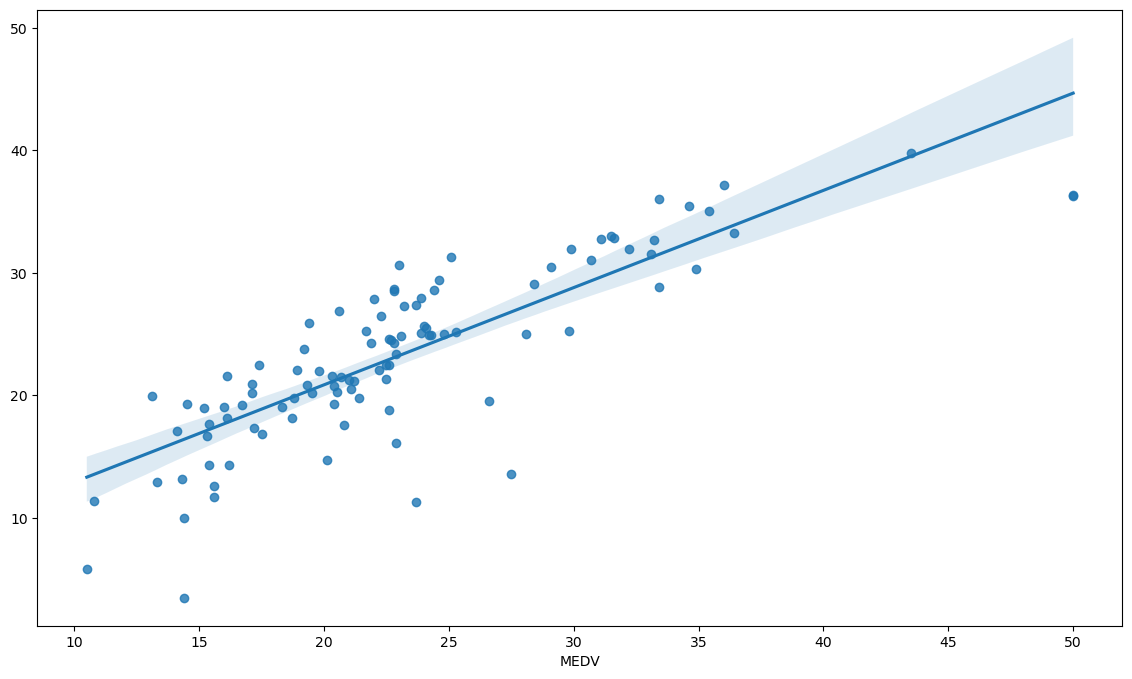

In [15]:
from sklearn.linear_model import LinearRegression
model(LinearRegression(), X_train, y_train,X_test, y_test)

## Decition tree

accuracy : 
1.0
Model results
MAE: 2.64
MSE: 12.15
RMSE: 1.62
R2_score: 0.75
--------------------
     Test  Predict
251  24.8     23.7
464  21.4     19.6
119  19.3     19.4
336  19.5     19.0
281  35.4     31.6
236  25.1     27.5
6    22.9     21.7
127  16.2     14.0
365  27.5     21.9
266  30.7     33.8


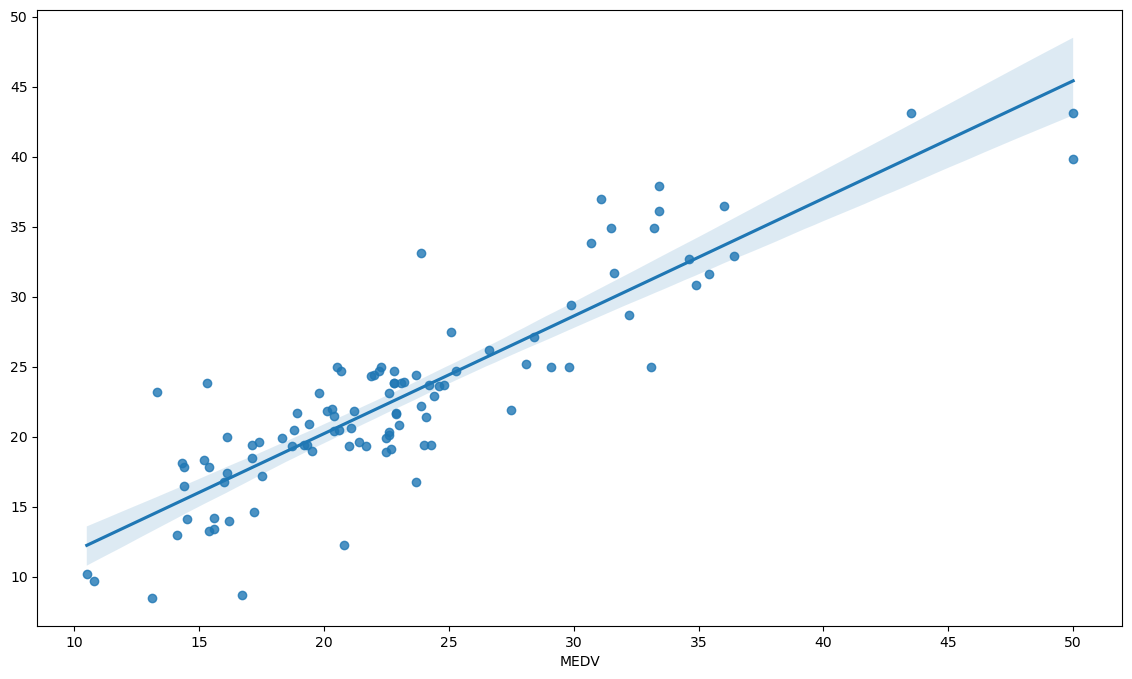

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor =  DecisionTreeRegressor()
model(regressor, X_train, y_train,X_test, y_test)

## SVR

accuracy : 
0.6525976511899346
Model results
MAE: 2.34
MSE: 13.25
RMSE: 1.53
R2_score: 0.52
--------------------
     Test    Predict
251  24.8  25.361708
464  21.4  19.069817
119  19.3  19.536326
336  19.5  20.166735
281  35.4  30.703332
236  25.1  26.330862
6    22.9  22.028717
127  16.2  16.778567
365  27.5  19.983690
266  30.7  28.507397


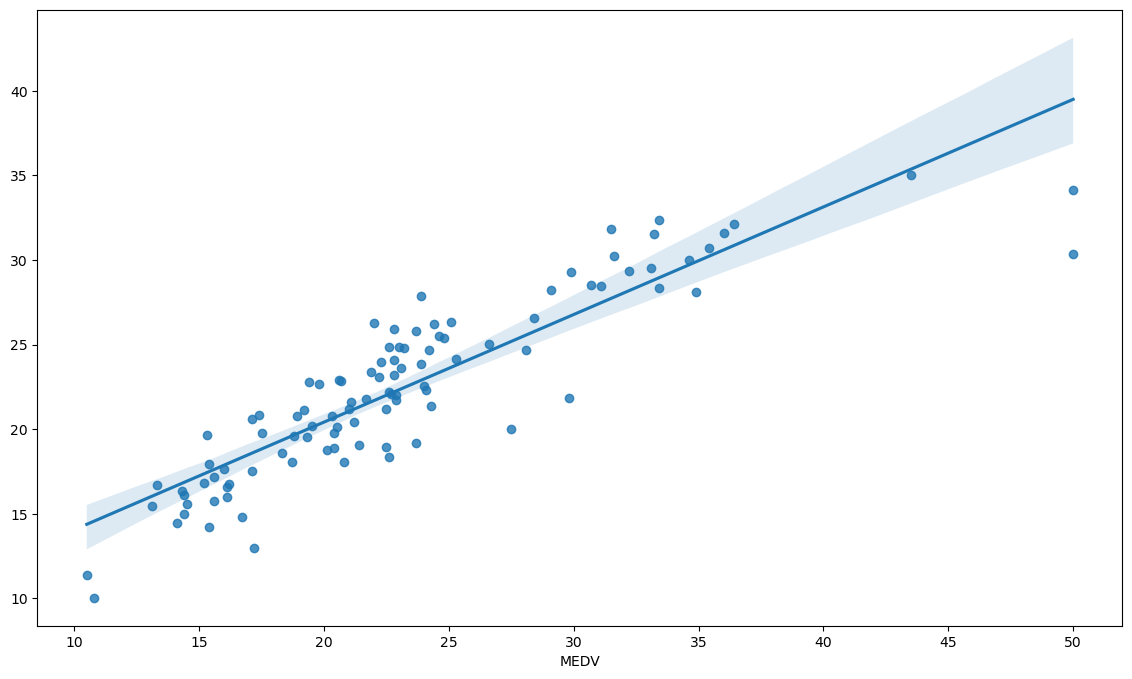

In [17]:
from sklearn.svm import SVR
regressor =  SVR()
model(regressor, X_train, y_train,X_test, y_test)

## Gradient Boosting


accuracy : 
0.9769888509568634
Model results
MAE: 1.72
MSE: 5.5
RMSE: 1.31
R2_score: 0.89
--------------------
     Test    Predict
251  24.8  28.142027
464  21.4  20.932155
119  19.3  21.749244
336  19.5  19.631858
281  35.4  34.192378
236  25.1  26.378717
6    22.9  21.931503
127  16.2  16.185076
365  27.5  19.716794
266  30.7  30.468488


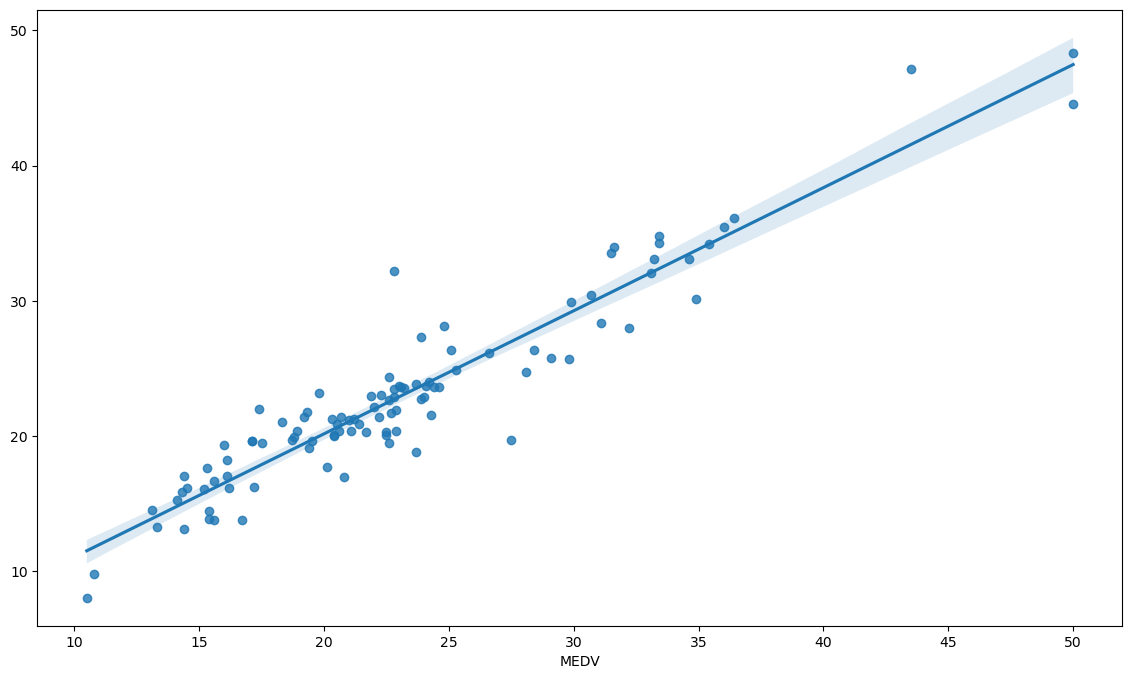

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
model(GradientBoostingRegressor(), X_train, y_train,X_test, y_test)